In [1]:
import tweepy
from textblob import TextBlob
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#Twitter API credentials
API_key='pNOM15N3ZEoZWLzhAQOBXMhv4'
API_secret_key='TdMVftuCIYqlmATE6VxYUslLzyVDZtXENJeTtjQ0WlxOEPKzdF'
access_token='1259299136349908994-Ky8rXmsdOGmGStvMWyr3c33dzwqOlY'
access_token_secret='vPH5TarikDG1TL6CWOpfnnsiajjWxfUabX8WYIDGJX0Jh'

In [3]:
#creating authentication object
auth=tweepy.OAuthHandler(API_key,API_secret_key)
auth.set_access_token(access_token,access_token_secret)
#creating API object
api=tweepy.API(auth)

In [4]:
public_tweets=api.search(q='Real Madrid',count=200)

In [5]:
for tweet in public_tweets:
    print(tweet.text+'\n')

RT @utdreport: Jamie Carragher: "There are only two clubs that are better than #mufc, and that's Barcelona &amp; Real Madrid — I will be flabbe…

RT @WhoScored: 📊 Cadiz are averaging the least possession in Europe's top 5 leagues this season (36.7%) 

🤯 They currently sit 5th in La Li…

@basketfaul Gelecek sene Real Madrid'in koçu olacak Obra reis. İşinde olsun İtalyan medyası

RT @utdreport: Paul Pogba's dream is to play for Real Madrid, but no one at Real Madrid is moving to sign Pogba. They never contacted Mino…

RT @theMadridZone: 🚨🌕| Real Madrid will only consider signing Paul Pogba if Manchester United massively lower the price they set for him in…

at least Real Madrid will join us in Europa

@_daniloteod Já quero ver CR dando piti em campo igual nos tempos de real Madrid

@InterCM16 Ovviamente ma è anche partita secca di un certo Real Madrid e per quanto vi riguarda dell’Inter... dunqu… https://t.co/su5IaJAZUd

Serieus @m_wijffelsAD ??

Martin Ødegaard deed geloof ik vorige wee

In [6]:
#creating dataframe for tweets
df=pd.DataFrame([tweet.text for tweet in public_tweets],columns=['Tweets'])

In [7]:
df

,Tweets
0,"RT @utdreport: Jamie Carragher: ""There are onl..."
1,RT @WhoScored: 📊 Cadiz are averaging the least...
2,@basketfaul Gelecek sene Real Madrid'in koçu o...
3,RT @utdreport: Paul Pogba's dream is to play f...
4,RT @theMadridZone: 🚨🌕| Real Madrid will only c...
...,...
95,@SrNaninho @paulpogba @elchiringuitotv @As_Tom...
96,RT @AlexandraJonson: Today it's 22 years since...
97,RT @Ultra_Suristic: Real Madrid 1-0 Valladolid...
98,RT @iurquizu: Siempre es interesante escuchar ...


In [8]:
df.describe()

,Tweets
count,100
unique,86
top,RT @AdriRM33: ¿Crees que Real Madrid pasará a ...
freq,3


In [9]:
#function to clean the tweets
def func1(tweet):
    tweet=re.sub(r'RT',' ',tweet)
    tweet=re.sub(r'@[^\s]+',' ',tweet)
    tweet=re.sub(r'#','',tweet)
    tweet=re.sub(r'[0-9]',' ',tweet)
    tweet=re.sub(r'https?:\/\/\S+','',tweet)
    return(tweet)

In [10]:
df['Tweets']=df['Tweets'].apply(func1)

In [11]:
df

,Tweets
0,"Jamie Carragher: ""There are only two clubs..."
1,📊 Cadiz are averaging the least possession...
2,Gelecek sene Real Madrid'in koçu olacak Obra...
3,Paul Pogba's dream is to play for Real Mad...
4,🚨🌕| Real Madrid will only consider signing...
...,...
95,Al Real Madrid hay qu… c
96,Today it's years since Real Sociedad su...
97,Real Madrid - Valladolid / \nReal M...
98,Siempre es interesante escuchar a Repres...


In [12]:
#checking  polarity of tweets 
df['Polarity']=df['Tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.polarity) 

In [13]:
# checking subjectivity of tweets
df['Subjectivity']=df['Tweets'].apply(lambda tweet:TextBlob(tweet).sentiment.subjectivity) 

In [14]:
df

,Tweets,Polarity,Subjectivity
0,"Jamie Carragher: ""There are only two clubs...",0.233333,0.600000
1,📊 Cadiz are averaging the least possession...,0.066667,0.433333
2,Gelecek sene Real Madrid'in koçu olacak Obra...,0.200000,0.300000
3,Paul Pogba's dream is to play for Real Mad...,0.200000,0.300000
4,🚨🌕| Real Madrid will only consider signing...,0.066667,0.766667
...,...,...,...
95,Al Real Madrid hay qu… c,0.200000,0.300000
96,Today it's years since Real Sociedad su...,0.200000,0.300000
97,Real Madrid - Valladolid / \nReal M...,0.200000,0.300000
98,Siempre es interesante escuchar a Repres...,0.000000,0.000000


In [15]:
#function to check whether the tweet is positive,negative or neutral with respect to polarity
def f(row):
    if(row['Polarity']>0):
        return'Positive'
    elif(row['Polarity']<0):
        return'Negative'
    else:
        return'Neutral'

In [16]:
df['Analysis']=df.apply(f,axis=1)

In [17]:
df

,Tweets,Polarity,Subjectivity,Analysis
0,"Jamie Carragher: ""There are only two clubs...",0.233333,0.600000,Positive
1,📊 Cadiz are averaging the least possession...,0.066667,0.433333,Positive
2,Gelecek sene Real Madrid'in koçu olacak Obra...,0.200000,0.300000,Positive
3,Paul Pogba's dream is to play for Real Mad...,0.200000,0.300000,Positive
4,🚨🌕| Real Madrid will only consider signing...,0.066667,0.766667,Positive
...,...,...,...,...
95,Al Real Madrid hay qu… c,0.200000,0.300000,Positive
96,Today it's years since Real Sociedad su...,0.200000,0.300000,Positive
97,Real Madrid - Valladolid / \nReal M...,0.200000,0.300000,Positive
98,Siempre es interesante escuchar a Repres...,0.000000,0.000000,Neutral


In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

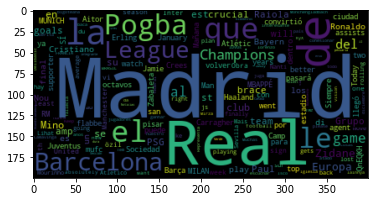

In [19]:
Words=' '.join(twets for twets in df['Tweets'])
WordCloud=WordCloud(collocations=False).generate(Words)
plt.imshow(WordCloud , interpolation="bilinear")
plt.show()


In [20]:
emotion=[]
for i in df["Analysis"]:
    if(i=="Negative"):
        emotion.append(0)
    elif(i=="Positive"):
        emotion.append(1)
    else:
        emotion.append(2)
y=[]
y.append(emotion.count(0))
y.append(emotion.count(1))
y.append(emotion.count(2))

                    
        

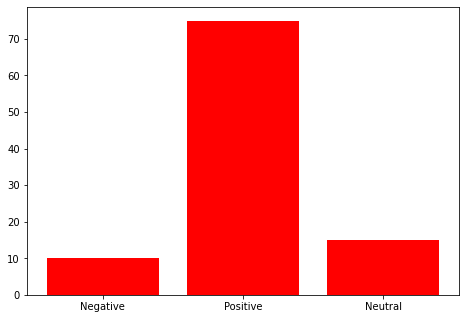

In [21]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
x=["Negative","Positive","Neutral"]
ax.bar(x,y,color='r')
plt.show()

In [22]:
count=0
count1=0
count2=0
for i in df["Analysis"]:
    if(i=="Negative"):
        count=count+1
    elif(i=="Positive"):
        count1=count1+1
    else:
        count2=count2+1

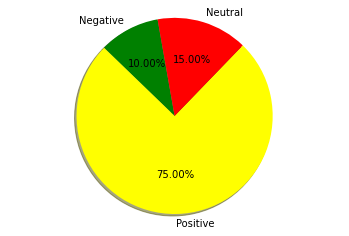

In [23]:
labels=['Negative','Positive','Neutral']
sizes=[count,count1,count2]
colors=['green','yellow','red']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.2f%%',shadow=True,startangle=100)
plt.axis('equal')
plt.show()